<a href="https://colab.research.google.com/github/Vrivas99/Google_colab/blob/main/nhanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('nhanes_data.csv',header=0,index_col=0,sep=";")
df.head()


,AGE_GROUP,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,,,,,,,,,
73564.0,Adult,61.0,Female,No,35.7,110.0,No,150.0,14.91
73568.0,Adult,26.0,Female,No,20.3,89.0,No,80.0,3.85
73576.0,Adult,16.0,Male,No,23.2,89.0,No,68.0,6.14
73577.0,Adult,32.0,Male,No,28.9,104.0,No,84.0,16.15
73580.0,Adult,38.0,Female,Yes,35.9,103.0,No,81.0,10.92


In [ ]:
RIDAGEYR = df["RIDAGEYR"]
print(f"Edad Promedio : {RIDAGEYR.mean()}")
print(f"Edad Media : {RIDAGEYR.median()}")
BMXBMI = df["BMXBMI"]
print(f"BMI Promedio : {BMXBMI.mean()}")
print(f"BMI Media : {BMXBMI.median()}")
LBXGLU = df["LBXGLU"]
print(f"Glucosa Promedio : {LBXGLU.mean()}")
print(f"Glucosa Media : {LBXGLU.median()}")
LBXGLT = df["LBXGLT"]
print(f"Glucosa Tolerancia Promedio : {LBXGLT.mean()}")
print(f"Glucosa Tolerancia Media : {LBXGLT.median()}")
LBXIN = df["LBXIN"]
print(f"Insulina Promedio : {LBXIN.mean()}")
print(f"Insulina Media : {LBXIN.median()}")



Edad Promedio : 41.79587357330992
Edad Media : 41.0
BMI Promedio : 29.608284818629652
BMI Media : 26.9
Glucosa Promedio : 99.5705069124424
Glucosa Media : 97.0
Glucosa Tolerancia Promedio : 114.85868102288022
Glucosa Tolerancia Media : 105.0
Insulina Promedio : 11.834793678665497
Insulina Media : 9.04


In [ ]:
df.describe()

,RIDAGEYR,BMXBMI,LBXGLU,LBXGLT,LBXIN
count,2278.000000,2233.000000,2170.000000,2229.000000,2278.000000
mean,41.795874,29.608285,99.570507,114.858681,11.834794
std,20.156111,21.822690,18.168081,46.902744,9.718812
min,12.000000,14.500000,63.000000,40.000000,0.140000
25%,24.000000,22.800000,91.000000,87.000000,5.860000
50%,41.000000,26.900000,97.000000,105.000000,9.040000
75%,58.000000,31.300000,104.000000,130.000000,14.440000
max,80.000000,380.800000,405.000000,604.000000,102.290000


<Axes: xlabel='SEQN'>

<Figure size 640x480 with 0 Axes>

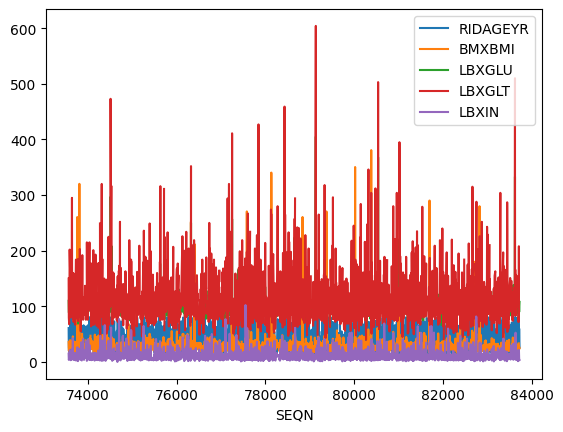

In [ ]:
plt.figure()
df.plot()

<Figure size 640x480 with 0 Axes>

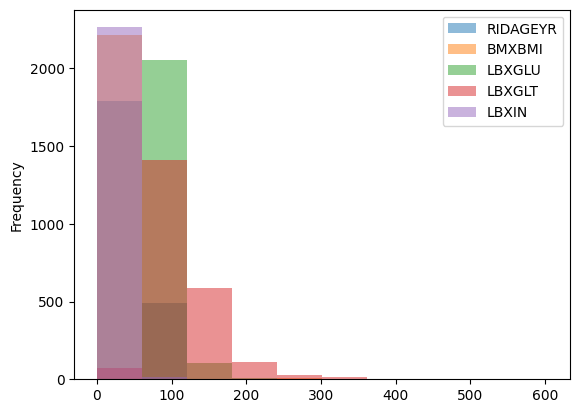

In [ ]:
plt.figure();
df.plot.hist(alpha=0.5);

In [ ]:
df["AGE_GROUP"].unique()


array(['Adult', 'Senior'], dtype=object)

In [ ]:
df["RIAGENDR"].unique()


array(['Female', 'Male', 'F', 'M'], dtype=object)

In [ ]:
df["PAQ605"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["DIQ010"].unique()

array(['No', 'Yes', 'Borderline'], dtype=object)

In [ ]:
df["RIAGENDR"] = df["RIAGENDR"].replace(to_replace= 'M', value = 'Male')
df["RIAGENDR"] = df["RIAGENDR"].replace(to_replace= 'F', value = 'Female')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform="pandas")
age_group_transform = enc.fit_transform(df[["AGE_GROUP"]])
age_transform = enc.fit_transform(df[["RIAGENDR"]])
paq605_transform = enc.fit_transform(df[["PAQ605"]])
diq010_transform = enc.fit_transform(df[["DIQ010"]])

ej = pd.concat([age_group_transform,age_transform,paq605_transform,diq010_transform],axis=1)
df = pd.concat([df,ej], axis=1).drop(columns= ['AGE_GROUP', 'RIAGENDR', 'PAQ605', 'DIQ010'])
df

,RIDAGEYR,BMXBMI,LBXGLU,LBXGLT,LBXIN,AGE_GROUP_Adult,AGE_GROUP_Senior,RIAGENDR_Female,RIAGENDR_Male,PAQ605_No,PAQ605_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes
SEQN,,,,,,,,,,,,,,
73564.0,61.0,35.7,110.0,150.0,14.91,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
73568.0,26.0,20.3,89.0,80.0,3.85,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
73576.0,16.0,23.2,89.0,68.0,6.14,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,32.0,28.9,104.0,84.0,16.15,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73580.0,38.0,35.9,103.0,81.0,10.92,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83711.0,38.0,33.5,100.0,73.0,6.53,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
83712.0,61.0,30.0,93.0,208.0,13.02,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
83713.0,34.0,23.7,103.0,124.0,21.41,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


<Figure size 640x480 with 0 Axes>

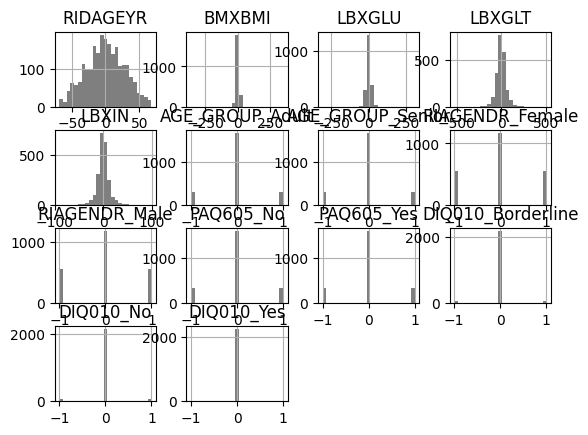

In [ ]:
plt.figure();
df.diff().hist(color="k", alpha=0.5, bins=25);

In [ ]:
x = df.isna().sum()
z = 0
for i in range(0,len(x)):
  if x[i] >= 1:
    z += x[i]
print(f'Cantidad de NaN encontrados : {z}')

Cantidad de NaN encontrados : 202


In [ ]:
df = df.fillna(df.mean())
df.isna().sum()

RIDAGEYR             0
BMXBMI               0
LBXGLU               0
LBXGLT               0
LBXIN                0
AGE_GROUP_Adult      0
AGE_GROUP_Senior     0
RIAGENDR_Female      0
RIAGENDR_Male        0
PAQ605_No            0
PAQ605_Yes           0
DIQ010_Borderline    0
DIQ010_No            0
DIQ010_Yes           0
dtype: int64